In [2]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

In [3]:
def parabola(x,a,b,c,d):
    return a*b**3*c*d*x

In [4]:
def der_a(a,b,c,d):
    return b**3*c*d
def der_b(a,b,c,d):
    return a*3*b**2*c*d
def der_c(a,b,c,d):
    return a*b**3*d
def der_d(a,b,c,d):
    return a*b**3*c

In [5]:
problem ={
    'num_vars': 4,
    'names': ['a','b','c','d'],
    'bounds': [[0,1]]*4
}

In [ ]:

param_values = saltelli.sample(problem, 10000)

x = np.array([1])
y = np.array([parabola(x, *params) for params in param_values])
# print(y)

sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

# print("Sobol Indices")
# print(sobol_indices)
sobol_indices

Text(0, 0.5, 'Index')

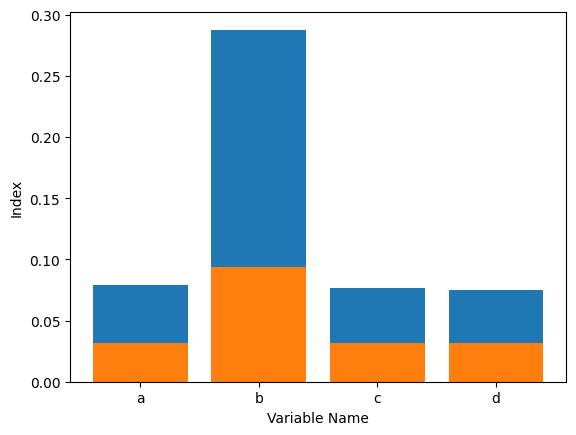

In [7]:
S1s = np.array([s['S1'] for s in sobol_indices])

a_=np.linspace(0,1,10)
b_=np.linspace(0,1,10)
c_=np.linspace(0,1,10)
d_=np.linspace(0,1,10)

a_=0.5
b_=0.5
c_=0.5
d_=0.5

# ad=
# for i,j,k,l in zip(a_,b_,c_,d_):
#     ad_sum+=der_a(a_,b_,c_,d_)
#     bd_sum+=der_b(a_,b_,c_,d_)
#     cd_sum+=der_c(a_,b_,c_,d_)
#     dd_sum+=der_d(a_,b_,c_,d_)


ad=der_a(a_,b_,c_,d_)
bd=der_b(a_,b_,c_,d_)
cd=der_c(a_,b_,c_,d_)
dd=der_d(a_,b_,c_,d_)


fig, ax=plt.subplots()
ax.bar(["a","b","c","d"],S1s[0,:])
ax.bar(["a","b","c","d"],[ad,bd,cd,dd])
ax.set_xlabel("Variable Name")
ax.set_ylabel("Index")

C:\Users\admin\AppData\Local\Temp\ipykernel_12136\1530194851.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


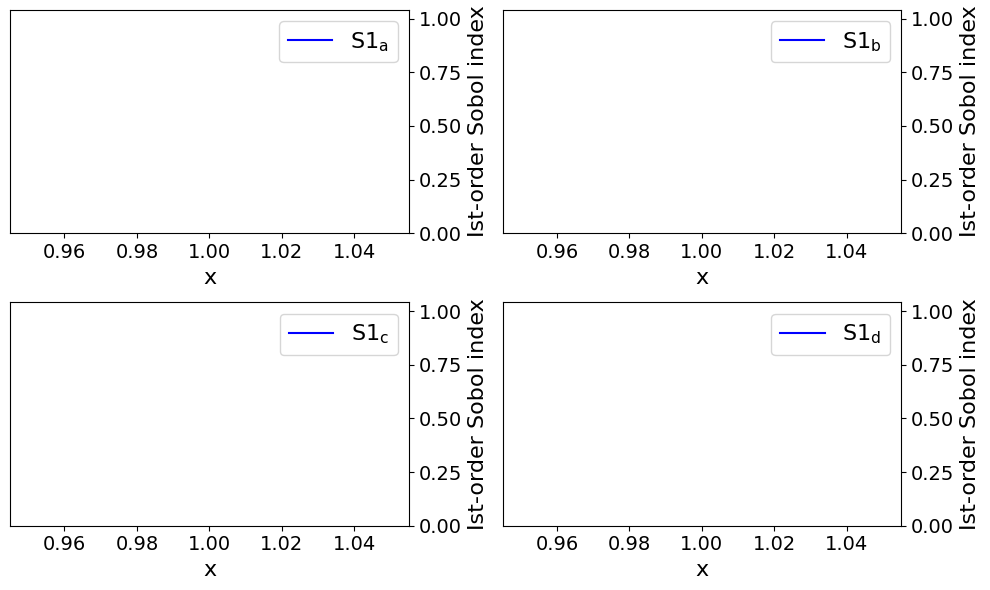

In [8]:
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(x, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='blue')
    ax.set_xlabel("x",fontsize=16)
    ax.set_ylabel("Ist-order Sobol index",fontsize=16)

    ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right',fontsize=16)

# ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# # in percent
# prediction_interval = 95

# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")

# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"
plt.tight_layout()
fig.savefig("sobol.png",dpi=800)
plt.show()

[[[       nan 0.08987191 0.02172422 0.02411719]
  [       nan        nan 0.10844745 0.11475095]
  [       nan        nan        nan 0.02587873]
  [       nan        nan        nan        nan]]]


ValueError: x and y must have same first dimension, but have shapes (1,) and (4, 4)

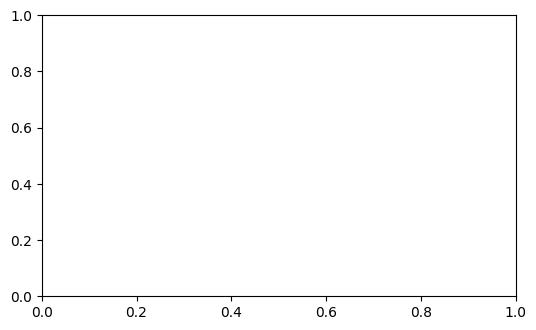

In [9]:
S1s = np.array([s['S2'] for s in sobol_indices])
print(S1s)
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax0 = fig.add_subplot(gs[0, 0])
# ax1 = fig.add_subplot(gs[0, 1])
# ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0]):
    ax.plot(x, S1s[i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='blue')
    ax.set_xlabel("x",fontsize=16)
    ax.set_ylabel("Ist-order Sobol index",fontsize=16)

    ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right',fontsize=16)

# ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# # in percent
# prediction_interval = 95

# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")

# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"
plt.tight_layout()
fig.savefig("sobol.png",dpi=800)
plt.show()